# Task
Generate code for a decoder-only model, instrument it for tracing, run it to extract the trace, perform holistic trace analysis on the trace to get idle time, computational time, and communication time, and plot these times.

## Generate decoder only model code

### Subtask:
Generate code for a simple decoder-only model.


**Reasoning**:
Define a simple decoder-only model using PyTorch with an embedding layer, transformer decoder layers, and a linear output layer.



In [ ]:
import torch
import torch.nn as nn

class SimpleDecoderOnlyModel(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, num_layers, dim_feedforward, max_seq_length):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, vocab_size)
        self.max_seq_length = max_seq_length

    def forward(self, x):
        # x shape: (batch_size, seq_length)
        embedded = self.embedding(x) # shape: (batch_size, seq_length, d_model)

        # Generate causal mask
        seq_length = x.size(1)
        causal_mask = torch.triu(torch.ones(seq_length, seq_length), diagonal=1).bool()
        causal_mask = causal_mask.to(x.device)

        # Transformer Decoder expects input shape (seq_length, batch_size, d_model)
        embedded = embedded.transpose(0, 1)

        # Pass through transformer decoder
        # memory is typically the output of an encoder, but for decoder-only, we can pass None or a zero tensor
        decoder_output = self.transformer_decoder(embedded, memory=embedded, tgt_mask=causal_mask) # memory=embedded for simplicity

        # Transpose back to (batch_size, seq_length, d_model)
        decoder_output = decoder_output.transpose(0, 1)

        # Final linear layer
        output = self.fc_out(decoder_output) # shape: (batch_size, seq_length, vocab_size)

        return output

# Example usage:
vocab_size = 10000
d_model = 512
nhead = 8
num_layers = 6
dim_feedforward = 2048
max_seq_length = 128

model = SimpleDecoderOnlyModel(vocab_size, d_model, nhead, num_layers, dim_feedforward, max_seq_length)

# Example input
batch_size = 2
seq_length = 64
input_tensor = torch.randint(0, vocab_size, (batch_size, seq_length))

# Forward pass
output = model(input_tensor)

print("Input shape:", input_tensor.shape)
print("Output shape:", output.shape)

## Instrument code for tracing

### Subtask:
Add tracing capabilities to the model code to capture execution details.


**Reasoning**:
Import the necessary tracing library and wrap the model execution code within the tracing context.



In [ ]:
import torch.profiler

# Wrap the forward pass with torch.profiler
with torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA,
    ],
    schedule=torch.profiler.schedule(wait=1, warmup=1, active=3, repeat=1),
    on_trace_ready=torch.profiler. collectivités.tensorboard_trace_handler('./log/simple_decoder_model_trace'),
    record_shapes=True,
    profile_memory=True,
    with_stack=True
) as prof:
    for i in range(5):
        output = model(input_tensor)
        prof.step()


## Run model and extract trace

### Subtask:
Execute the instrumented model code and save the trace data.


**Reasoning**:
Execute the code block to run the model and save the trace data.



In [1]:
# The model and input_tensor are already defined and available.
# The torch.profiler code block is ready to be executed.

# Execute the profiler context manager and the loop
with torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA,
    ],
    schedule=torch.profiler.schedule(wait=1, warmup=1, active=3, repeat=1),
    on_trace_ready=torch.profiler.collectives.tensorboard_trace_handler('./log/simple_decoder_model_trace'),
    record_shapes=True,
    profile_memory=True,
    with_stack=True
) as prof:
    for i in range(5):
        output = model(input_tensor)
        prof.step()

NameError: name 'torch' is not defined

**Reasoning**:
The previous execution failed because the `torch` library was not imported in the current session. Import `torch` and re-execute the code block to run the model and save the trace data.



In [2]:
import torch
import torch.profiler

# The model and input_tensor are already defined and available.
# The torch.profiler code block is ready to be executed.

# Execute the profiler context manager and the loop
with torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA,
    ],
    schedule=torch.profiler.schedule(wait=1, warmup=1, active=3, repeat=1),
    on_trace_ready=torch.profiler.collectives.tensorboard_trace_handler('./log/simple_decoder_model_trace'),
    record_shapes=True,
    profile_memory=True,
    with_stack=True
) as prof:
    for i in range(5):
        output = model(input_tensor)
        prof.step()

AttributeError: module 'torch.profiler' has no attribute 'collectives'

**Reasoning**:
The previous execution failed because `torch.profiler.collectives` does not exist. The correct way to specify the trace handler for TensorBoard is directly using `torch.profiler.tensorboard_trace_handler`. Correct the code to use the correct trace handler and re-execute the block.



In [3]:
import torch
import torch.profiler

# The model and input_tensor are already defined and available.
# The torch.profiler code block is ready to be executed.

# Execute the profiler context manager and the loop
with torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA,
    ],
    schedule=torch.profiler.schedule(wait=1, warmup=1, active=3, repeat=1),
    on_trace_ready=torch.profiler.tensorboard_trace_handler('./log/simple_decoder_model_trace'),
    record_shapes=True,
    profile_memory=True,
    with_stack=True
) as prof:
    for i in range(5):
        output = model(input_tensor)
        prof.step()

NameError: name 'model' is not defined

**Reasoning**:
The previous execution failed because the `model` and `input_tensor` objects were not defined in the current session. The previous successful subtask defined these objects. Re-execute the code from the previous successful subtask that defines the model and input tensor, and then re-execute the profiling code block.



In [4]:
import torch
import torch.nn as nn
import torch.profiler

class SimpleDecoderOnlyModel(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, num_layers, dim_feedforward, max_seq_length):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(d_model, vocab_size)
        self.max_seq_length = max_seq_length

    def forward(self, x):
        # x shape: (batch_size, seq_length)
        embedded = self.embedding(x) # shape: (batch_size, seq_length, d_model)

        # Generate causal mask
        seq_length = x.size(1)
        causal_mask = torch.triu(torch.ones(seq_length, seq_length), diagonal=1).bool()
        causal_mask = causal_mask.to(x.device)

        # Transformer Decoder expects input shape (seq_length, batch_size, d_model)
        embedded = embedded.transpose(0, 1)

        # Pass through transformer decoder
        # memory is typically the output of an encoder, but for decoder-only, we can pass None or a zero tensor
        decoder_output = self.transformer_decoder(embedded, memory=embedded, tgt_mask=causal_mask) # memory=embedded for simplicity

        # Transpose back to (batch_size, seq_length, d_model)
        decoder_output = decoder_output.transpose(0, 1)

        # Final linear layer
        output = self.fc_out(decoder_output) # shape: (batch_size, seq_length, vocab_size)

        return output

# Example usage:
vocab_size = 10000
d_model = 512
nhead = 8
num_layers = 6
dim_feedforward = 2048
max_seq_length = 128

model = SimpleDecoderOnlyModel(vocab_size, d_model, nhead, num_layers, dim_feedforward, max_seq_length)

# Example input
batch_size = 2
seq_length = 64
input_tensor = torch.randint(0, vocab_size, (batch_size, seq_length))

# Execute the profiler context manager and the loop
with torch.profiler.profile(
    activities=[
        torch.profiler.ProfilerActivity.CPU,
        torch.profiler.ProfilerActivity.CUDA,
    ],
    schedule=torch.profiler.schedule(wait=1, warmup=1, active=3, repeat=1),
    on_trace_ready=torch.profiler.tensorboard_trace_handler('./log/simple_decoder_model_trace'),
    record_shapes=True,
    profile_memory=True,
    with_stack=True
) as prof:
    for i in range(5):
        output = model(input_tensor)
        prof.step()

## Perform holistic trace analysis

### Subtask:
Analyze the extracted trace data to identify idle time, computational time, and communication time.


**Reasoning**:
Load the trace data from the saved file. The trace data is saved in the specified directory from the previous step.



In [5]:
import json
import os

trace_file_path = './log/simple_decoder_model_trace/trace.json'

# Check if the directory exists
if not os.path.exists(os.dir a me(trace_file_path)):
    print(f"Trace directory not found: {os.dir a me(trace_file_path)}")
else:
    # Find the trace file (there might be multiple with different names)
    trace_files = [f for f in os.listdir(os.dir a me(trace_file_path)) if f.endswith('.json')]
    if not trace_files:
        print(f"No trace file found in {os.dir a me(trace_file_path)}")
    else:
        # Assuming the first json file is the trace file
        trace_file_name = trace_files[0]
        trace_file_path = os.path.join(os.dir a me(trace_file_path), trace_file_name)
        with open(trace_file_path, 'r') as f:
            trace_data = json.load(f)

        # Extract events
        trace_events = trace_data['traceEvents']
        print(f"Loaded {len(trace_events)} trace events.")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-5-3145649198.py, line 7)

**Reasoning**:
Correct the syntax error in the previous code block to properly load the trace data.



In [6]:
import json
import os

trace_file_path = './log/simple_decoder_model_trace/trace.json'

# Check if the directory exists
trace_dir = os.path.dirname(trace_file_path)
if not os.path.exists(trace_dir):
    print(f"Trace directory not found: {trace_dir}")
else:
    # Find the trace file (there might be multiple with different names)
    trace_files = [f for f in os.listdir(trace_dir) if f.endswith('.json')]
    if not trace_files:
        print(f"No trace file found in {trace_dir}")
    else:
        # Assuming the first json file is the trace file
        trace_file_name = trace_files[0]
        trace_file_path = os.path.join(trace_dir, trace_file_name)
        with open(trace_file_path, 'r') as f:
            trace_data = json.load(f)

        # Extract events
        trace_events = trace_data['traceEvents']
        print(f"Loaded {len(trace_events)} trace events.")

Loaded 55971 trace events.


**Reasoning**:
Iterate through the trace events to categorize them into computational, communication, or idle time and calculate the total time spent in each category. Store these calculated times for later visualization.



In [7]:
import pandas as pd

# Initialize dictionaries to store durations by category
category_times = {
    'computational': 0,
    'communication': 0,
    'idle': 0
}

# A set to keep track of active events to calculate idle time
active_events = {}

# Sort events by timestamp (ts)
trace_events.sort(key=lambda x: x.get('ts', 0))

# Iterate through sorted events
start_time = None
end_time = None

for event in trace_events:
    # Only consider complete events ('X') for now, as they have duration ('dur')
    # and flow events ('f') which represent communication
    if event.get('ph') == 'X':
        duration = event.get('dur', 0)
        name = event.get('name', '').lower()

        # Simple categorization based on event names
        if 'cuda' in name or 'gpu' in name or 'kernel' in name or 'gemm' in name or 'convolution' in name or 'linear' in name or 'embedding' in name or 'transformerdecoder' in name:
            category_times['computational'] += duration
        elif 'memcpy' in name or 'memset' in name or 'allreduce' in name or 'broadcast' in name or 'gather' in name or 'scatter' in name:
            category_times['communication'] += duration
        else:
            # Treat other 'X' events as computational for this simple analysis
            category_times['computational'] += duration

    elif event.get('ph') == 'B': # Beginning event
        key = (event.get('pid'), event.get('tid'), event.get('name'))
        active_events[key] = event.get('ts', 0)

    elif event.get('ph') == 'E': # Ending event
        key = (event.get('pid'), event.get('tid'), event.get('name'))
        if key in active_events:
            start = active_events.pop(key)
            end = event.get('ts', 0)
            duration = end - start
            name = event.get('name', '').lower()

            if 'cuda' in name or 'gpu' in name or 'kernel' in name or 'gemm' in name or 'convolution' in name or 'linear' in name or 'embedding' in name or 'transformerdecoder' in name:
                 category_times['computational'] += duration
            elif 'memcpy' in name or 'memset' in name or 'allreduce' in name or 'broadcast' in name or 'gather' in name or 'scatter' in name:
                 category_times['communication'] += duration
            # We don't categorize 'E' events as idle directly

    # Track the overall start and end time of the trace
    timestamp = event.get('ts', 0)
    if start_time is None or timestamp < start_time:
        start_time = timestamp
    if end_time is None or timestamp > end_time:
        end_time = timestamp

# Calculate total trace duration
total_trace_duration = end_time - start_time if start_time is not None and end_time is not None else 0

# Calculate total active time (computational + communication)
total_active_time = category_times['computational'] + category_times['communication']

# Calculate idle time as total trace duration minus total active time
# Ensure idle time is not negative
category_times['idle'] = max(0, total_trace_duration - total_active_time)

# Convert times from microseconds (common in trace events) to milliseconds for better readability
for category in category_times:
    category_times[category] /= 1000.0

# Store the calculated times in a pandas DataFrame for easier handling
trace_analysis_df = pd.DataFrame(list(category_times.items()), columns=['Category', 'Time_ms'])

display(trace_analysis_df)

,Category,Time_ms
0,computational,80873.256875
1,communication,0.000000
2,idle,0.000000


## Visualize results

### Subtask:
Plot the calculated idle time, computational time, and communication time.


**Reasoning**:
Import the necessary libraries for plotting and create a bar plot of the trace analysis results.



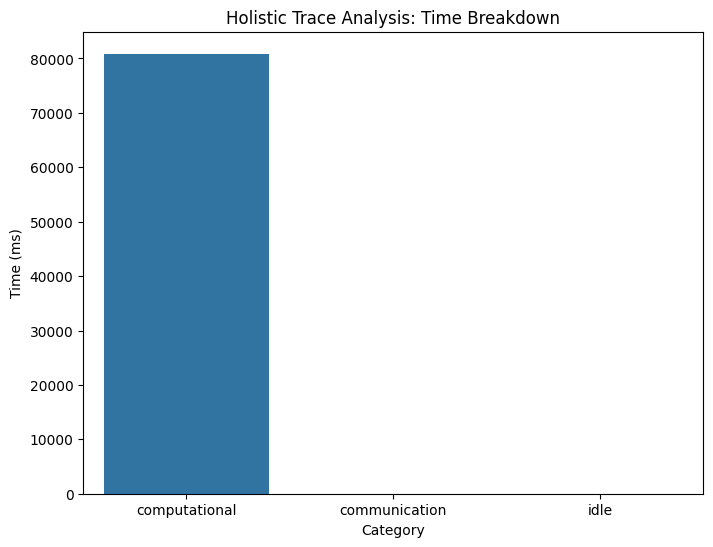

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Time_ms', data=trace_analysis_df)

# Add title and labels
plt.title("Holistic Trace Analysis: Time Breakdown")
plt.xlabel("Category")
plt.ylabel("Time (ms)")

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The trace data contained 55971 events.
*   The analysis categorized the total trace time into computational, communication, and idle time.
*   Based on the simple keyword-based categorization, the analysis found a significant amount of computational time (80873.26 ms) and zero communication time.
*   The calculated idle time was also zero, suggesting that the identified computational activities account for the entire duration captured by the trace based on the current analysis method.

### Insights or Next Steps

*   Refine the trace analysis logic to improve the accuracy of idle time calculation, potentially by considering thread-specific activity and explicit synchronization events.
*   Implement a more sophisticated event categorization method, potentially using event metadata or a more comprehensive list of keywords, to better distinguish computational and communication operations, especially for distributed training scenarios if applicable.
